目標: 了解利用 PANDAS 整理資料, 利用資料視覺化可以很快的判斷結果

重點: 資料整理與視覺化可以加速理解機器學習

#### 載入資料後的前處理

In [1]:
# 導入相關的庫
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# 導入數據集
df_red = pd.read_csv("./winequality_datasets/winequality-red.csv",sep=';')
df_white = pd.read_csv("./winequality_datasets/winequality-white.csv",sep=';')

In [5]:
# 檢查數據
df_white.info(),df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

(None, None)

In [6]:
# 檢查重複數據
df_white.duplicated().sum(),df_red.duplicated().sum()

(937, 240)

In [7]:
# 移除重複列
df_white.drop_duplicates(inplace = True)
df_red.drop_duplicates(inplace = True)

In [8]:
# 檢查遺失值
df_red.isnull().sum().sum(), df_white.isnull().sum().sum()

(0, 0)

In [9]:
# 做合併
df_wine = df_red.append(df_white)
df_wine.to_csv('winequality.csv', index=False)

#### 開始作圖 (視覺化)

In [10]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


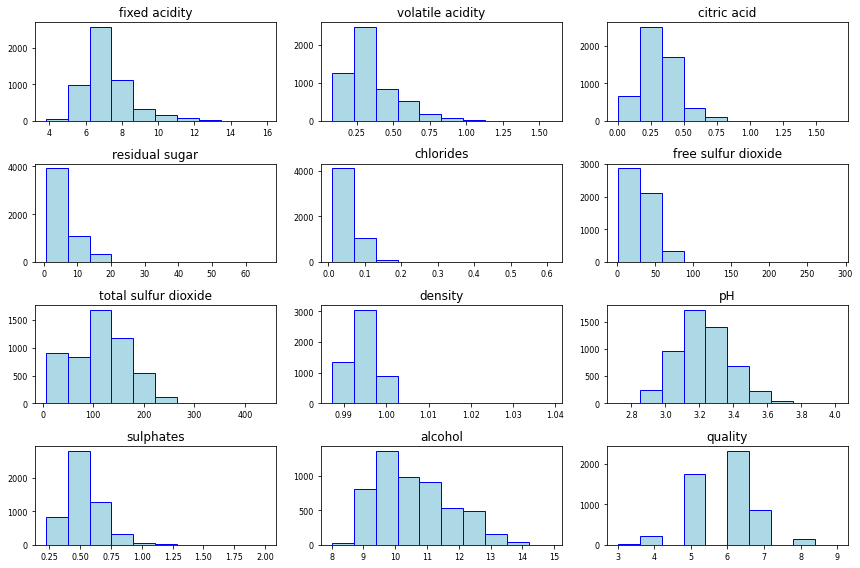

In [11]:
# 直方圖
df_wine.hist(bins=10, color='lightblue',edgecolor='blue',xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(1,1,3,3))

熱圖是數據的二-D可視化,其中兩個要素之間的關係量級由色調表示。熱圖中的梯度根據屬性之間的相關性強度而變化。在下面的示例中,高度相關的屬性的陰影比其餘屬性暗。

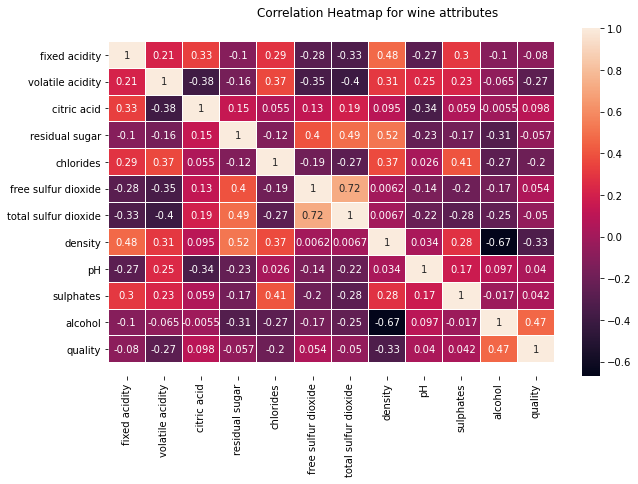

In [12]:
# 熱力圖
f, ax = plt.subplots(figsize=(10, 6))
b = sns.heatmap(df_wine.corr(), annot=True, linewidths=.05, ax=ax)
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title= f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)

聯合圖用於顯示兩個變數之間的關係。您可以選擇從 5 個選項中繪製的繪圖種類 - 散點、reg、十六進位、kde、resid。下面我展示了三個使用線性回歸線('reg'的例子)
1. 第一個示例"檸檬酸"和"固定酸度"具有正相關關係,因此圖形是向上的。
2. 然而,硫酸鹽和酒精的變數是相關的。因此,線性回歸線幾乎是平的。
3.具有"揮發性酸度"和"檸檬酸"屬性的示例具有負相關性,因此圖呈向下。

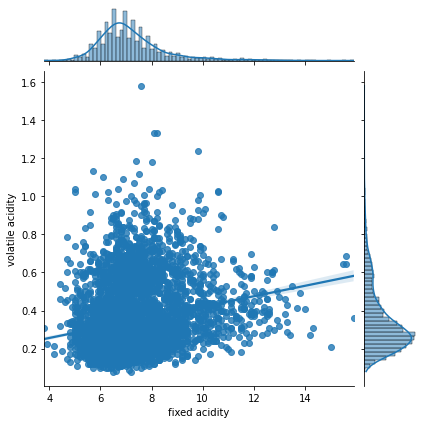

In [13]:
# 聯合圖
sns.jointplot(data=df_wine, x="fixed acidity", y="volatile acidity", kind = 'reg')

In [14]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


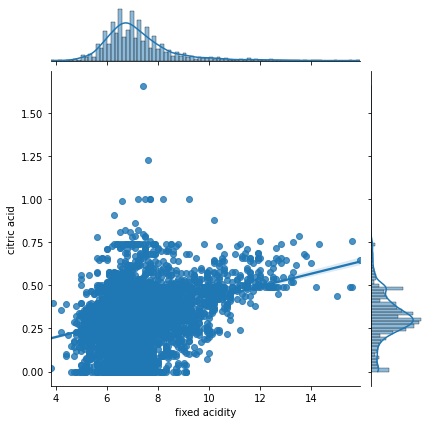

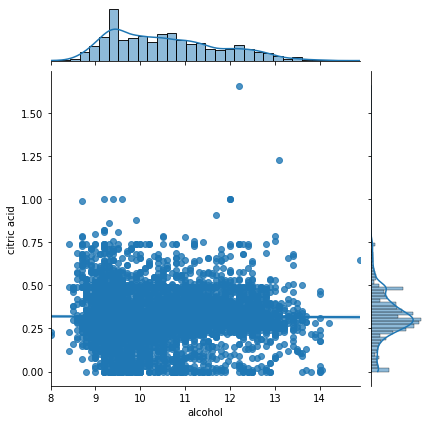

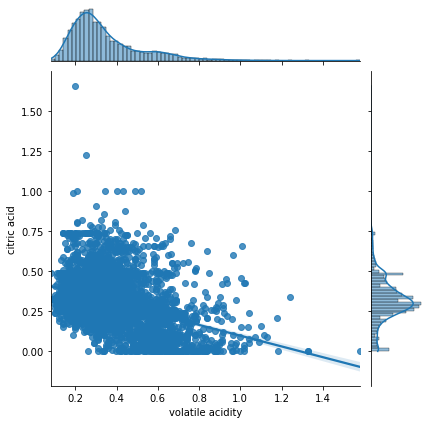

In [16]:
#Plotting Jointplot, 使用 'reg'== regression 回歸線繪製關係圖
a = sns.jointplot(x="fixed acidity", y="citric acid",data = df_wine,kind ='reg', color = None)
b = sns.jointplot(x="alcohol", y="citric acid", data = df_wine, kind = 'reg')
c = sns.jointplot(x="volatile acidity", y="citric acid", data = df_wine, kind = 'reg')

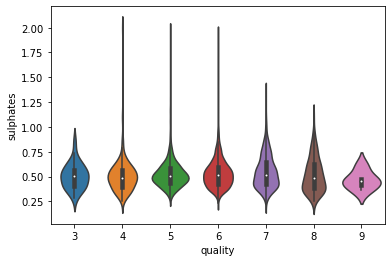

In [17]:
# 小提琴圖
ax = sns.violinplot(x="quality", y="sulphates", data=df_wine)